In [351]:
# Packages
#-----------Generic-------------#
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import model_selection
#----------Clustering-----------#
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
#---------Algorithms------------#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#-------Metrics-----------------#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

### Question 1

In [357]:
def read_csv(path: str) -> 'dataframe':
    '''read the excel file and return a df'''
    
    return pd.read_csv(path)


def drop_cols(df: 'dataframe', cols: list):
    '''drop columns that are specified'''
    df.drop(columns=cols, inplace=True)

    
def label_encoder(df: 'dataframe', col: 'str'):
    '''label encodes the column of the df
    it uses sklearn label encoder'''
    le = preprocessing.LabelEncoder()
    vals = df[col].values
    le.fit(vals)
    encoded_vals = le.transform(vals)
    df[col] = encoded_vals


#This function is not used (Normalization is not necessary for K-means
#Performing k-means on normalized data gave the same result
# However this is used for predictive algorithms
def normalize(df: 'dataframe', cols: list):
    '''normalizes columns of dataframe'''
    transformer = preprocessing.Normalizer()
    for col in cols:
        vals = df[col].values.reshape(1, -1)
        transformer.fit(vals)
        norm_vals = transformer.transform(vals)
        df[col] = norm_vals[0]


def k_means_manhattan(df: 'dataframe'):
    '''
    This function labels the data using k-means cluster
    have used pyClustering library since you can define type of distance measuring
    distance_metric(2) refers to manhattan in this library
    '''
    initial_centers = random_center_initializer(df.values, 5, random_state=5).initialize()
    #distance metric 2 for manhattan
    Kmeans_manhattan = kmeans(df, initial_centers=initial_centers, metric=distance_metric(2))
    Kmeans_manhattan.process()
    pyClusters = Kmeans_manhattan.get_clusters()
    pyCenters = Kmeans_manhattan.get_centers()
    pyEncoding = Kmeans_manhattan.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, df)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    df['Labels'] = pyLabels


def train_test_split(df: 'dataframe'):
    '''
    This function normalizes and splits the data into train and test
    '''
    normalize(df, ['Annual_Income_(k$)', 'Spending_Score'])
    X = df[['Annual_Income_(k$)', 'Spending_Score']]
    Y = df[['Labels']]
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=0)
    return X_train, X_test, y_train, y_test


def logistic_reg(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying logistic regression
    '''
    print('performing logistic regression...')
    lr = LogisticRegression(random_state=0, multi_class='multinomial')
    lr.fit(X_train.values, y_train.values.ravel())
    y_lr = lr.predict(X_test.values)
    print('metrics for logistic regression...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_lr)}')
    print('confusion matrix for Logistic Regression\n')
    cm = confusion_matrix(y_test.values.ravel(), y_lr, labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot()
    plt.show()
    
def decesion_tree(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying decesion tree
    '''
    print('performing Decesion Tree...')
    dt = DecisionTreeClassifier(random_state=0, max_depth=5)
    dt.fit(X_train.values, y_train.values.ravel())
    y_dt = dt.predict(X_test.values)
    print('metrics for Decesion Tree...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_dt)}')
    print('confusion matrix for Decesion Tree\n')
    cm = confusion_matrix(y_test.values.ravel(), y_dt, labels=dt.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
    disp.plot()
    plt.show()


def random_forest(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying random forest
    '''
    rf = RandomForestClassifier(random_state=0, max_depth=5)
    rf.fit(X_train.values, y_train.values)
    y_rf = rf.predict(X_test)
    return y_rf

def naive_bayes(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying naive bayes
    '''
    nv = GaussianNB()
    nv.fit(X_train.values, y_train.values)
    y_nv = nv.predict(X_test)
    return y_nv


#### Loading Data

In [319]:
df = read_excel('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [320]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [322]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [323]:
print('label encoding data...')
label_encoder(df, 'Genre')
print('Removing columns that are not needed...')
drop_cols(df, ['CustomerID', 'Genre', 'Age'])
print('data after pre-processing...')
df.head(10)

label encoding data...
Removing columns that are not needed...
data after pre-processing...


,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


#### Running K-Mean clustering and Labeling Data

In [324]:
print('running k-means clustering with manhattan distance...')
print('applying the labels based on k-means')
k_means_manhattan(df)
print('data after labelling...')
df.head(10)

running k-means clustering with manhattan distance...
applying the labels based on k-means
data after labelling...


,Annual_Income_(k$),Spending_Score,Labels
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
5,17,76,1
6,18,6,3
7,18,94,1
8,19,3,3
9,19,72,1


#### Performing Algorithms

In [328]:
# splitting the data and normalizing
X_train, X_test, y_train, y_test = train_test_split(df)

**Logistic Regression**

performing logistic regression...
metrics for logistic regression...
accuracy: 0.46
confusion matrix for Logistic Regression



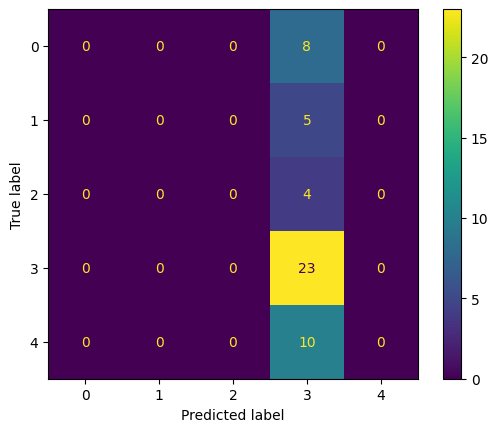

In [354]:
logistic_reg(X_train, X_test, y_train, y_test)

**Decesion Tree**

performing Decesion Tree...
metrics for Decesion Tree...
accuracy: 0.98
confusion matrix for Decesion Tree



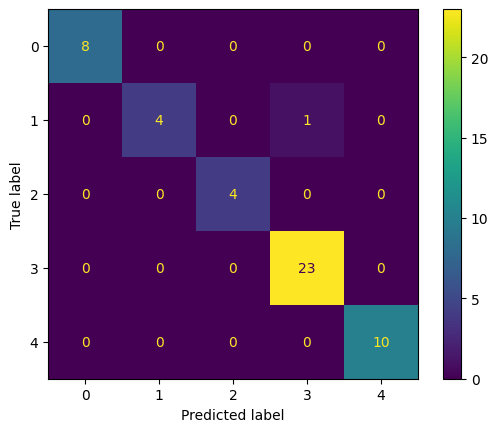

In [358]:
decesion_tree(X_train, X_test, y_train, y_test)